In [83]:
import sys
import calnet.calnet as cc
import calnet.dynamics as dyn
import numpy as np
from importlib import reload
import pdb
import matplotlib.pyplot as plt
import glob
import calnet.utils as utils
import pyute as ut
import size_contrast_analysis as sca
reload(cc)
reload(utils)

<module 'calnet.utils' from '/Users/dan/Documents/code/adesnal/calnet/utils.py'>

In [69]:
# wtdict = np.load('weights_200410a.npy',allow_pickle=True)[()]
# wtdict = np.load('weights_200607.npy',allow_pickle=True)[()]
# wtdict = np.load('weights_from_opto_200610.npy',allow_pickle=True)[()]
# wtbase = '/Users/dan/Documents/notebooks/mossing-PC/shared_data/calnet_data/weights/'
# good_fits = ['200714c/005','200714c/008','200714d/021','200715a/022','200715a/024',\
#             '200716a/034','200716a/035','200716a/048','200716b/006','200716b/042','200716b/061','200716b/087','200716b/091',\
#             '200717a/010','200717a/031','200717a/066','200717a/073','200717a/075','200717a/087','200717a/096',\
#             '200717b/028','200717b/052','200717b/059','200717b/060','200717b/068','200717b/079','200717b/084']
# good_fits = ['200721e/%03d'%iwt for iwt in range(27)]

# weights_base = '/Users/dan/Documents/notebooks/mossing-PC/shared_data/calnet_data/weights/weights_200721e/'
# good_fits = ['006','010','012','014','018','019','020','021','023','025','030',\
#              '035','042','045','049','058','060','064','066','076','078','083']
# weights_files = [weights_base+fit+'.npy' for fit in good_fits]

weights_files = np.load('weights_files_list.npy',allow_pickle=True)#[:10]

reload(cc)
nwt = len(weights_files)
mdls = [None for iwt in range(nwt)]
for iwt in range(nwt):
#     wtfile = 'weights_'+good_fits[iwt]+'.npy'
#     wtdict = np.load(wtbase+wtfile,allow_pickle=True)[()]
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    mdls[iwt] = cc.ModelOri(wtdict,nT=1)

In [70]:
Niter = int(1e3)
opto_levels = 1*np.linspace(-1,1,11)
dt = 1e-1

In [71]:
reload(dyn)
YY_ss = [None for iwt in range(nwt)]
for iwt in range(nwt):
    print('model #%d'%iwt)
    YY_ss[iwt] = dyn.compute_steady_state_Model(mdls[iwt],Niter=Niter,dt=dt)

model #0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #9
0
1
2
3
4
5
6
7
8
9
10
11
12

In [72]:
reload(dyn)
# reload(calnet)
YY_opto = [None for iwt in range(nwt)]
for iwt in range(nwt):
    print('model #%d'%iwt)
    YY_opto[iwt] = dyn.compute_steady_state_Model(mdls[iwt],Niter=Niter,fix_dim=2,inj_mag=opto_levels,sim_type='inj',dt=dt)

model #0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
model #9
0
1
2
3
4
5
6
7
8
9
10
11
12

In [36]:
# nwt = 20
# YY_opto = YY_opto[:nwt]
# YY_ss = YY_ss[:nwt]

In [37]:
# ut.mkdir('../shared_data/calnet_data/dynamics/')
# np.save('../shared_data/calnet_data/dynamics/200724a.npy',YY_opto)
# YY_opto = np.load('../shared_data/calnet_data/dynamics/200724a.npy',allow_pickle=True)[()]

In [73]:
shp = YY_opto[0].shape
YY_opto_small = np.nan*np.ones((nwt,shp[0],shp[1],shp[3]))
tlast = 3000
for iwt in range(nwt):
    if not YY_opto[iwt] is None:
        YY_opto_small[iwt] = np.nanmean(YY_opto[iwt][:,:,-tlast:,:],2)
    

In [74]:
Niter = 1001

In [75]:
shp = YY_opto[0].shape
Niter = 101
YY_opto_medium = np.nan*np.ones((nwt,shp[0],shp[1],Niter,shp[3]))
for iwt in range(nwt):
    if not YY_opto[iwt] is None:
        YY_opto_medium[iwt] = YY_opto[iwt][:,:,::10,:]
        
# Niter = 1001
# YY_opto_medium = YY_opto.copy()
    

In [31]:
# del YY_opto

In [83]:
np.save('YY_opto_medium_200921a.npy',YY_opto_medium)
YY_opto_medium = np.load('YY_opto_medium_200921a.npy')[()]

In [76]:
YY_opto_medium.shape

(54, 11, 36, 101, 8)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


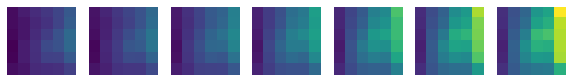

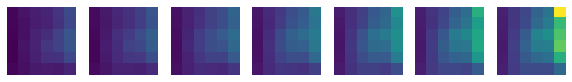

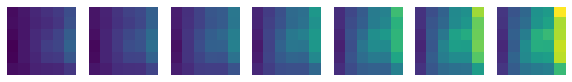

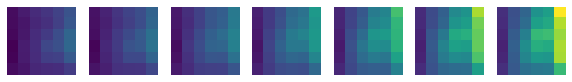

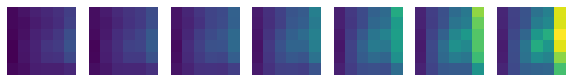

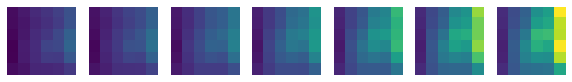

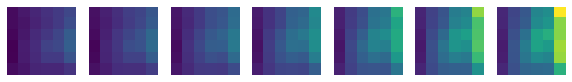

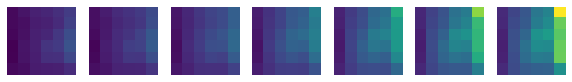

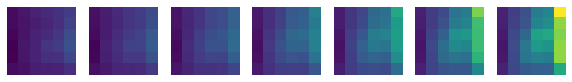

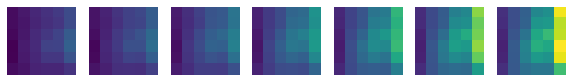

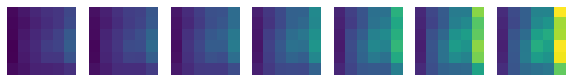

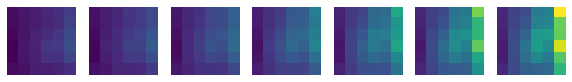

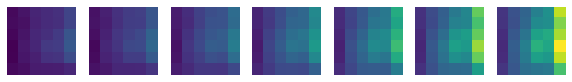

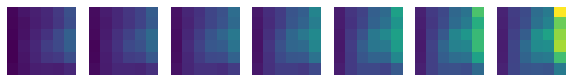

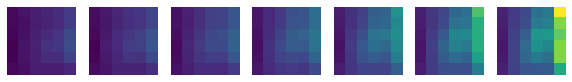

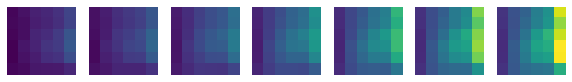

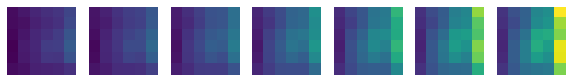

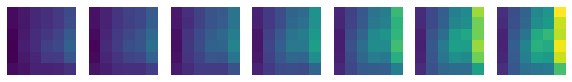

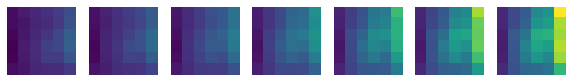

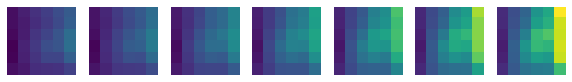

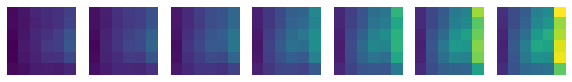

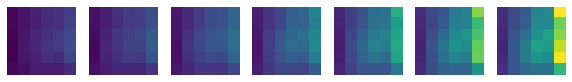

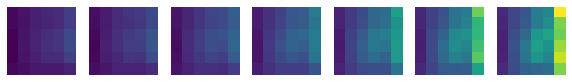

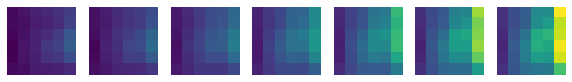

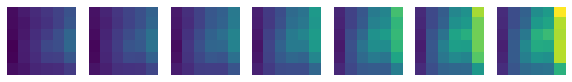

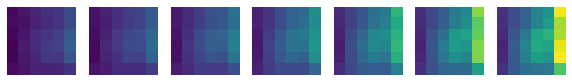

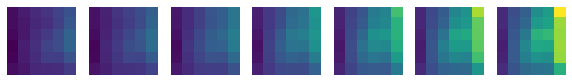

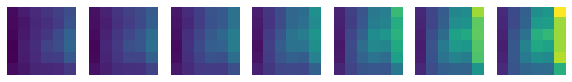

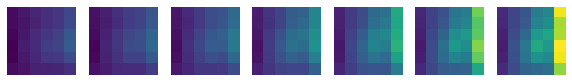

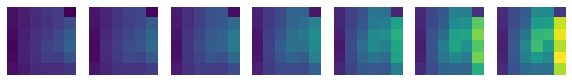

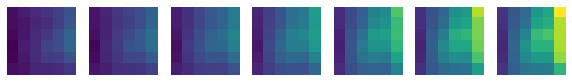

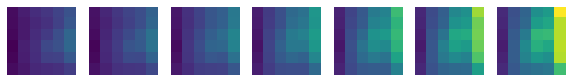

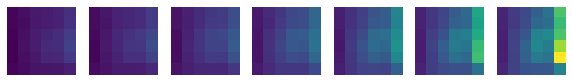

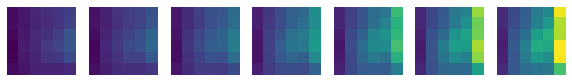

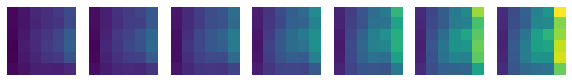

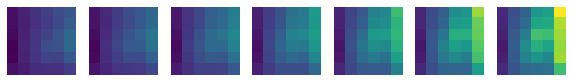

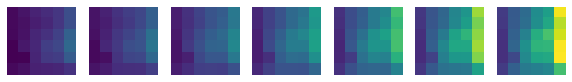

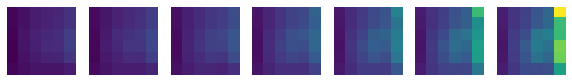

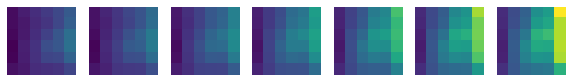

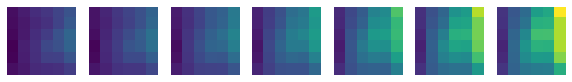

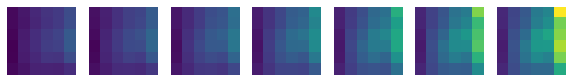

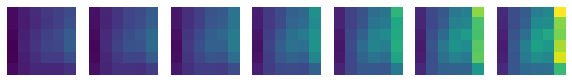

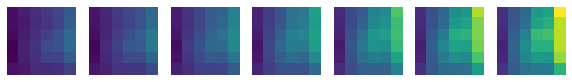

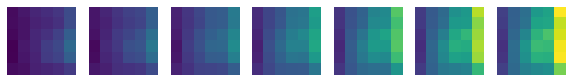

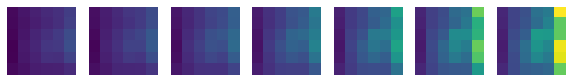

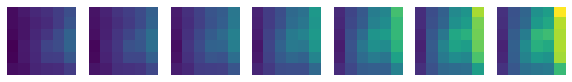

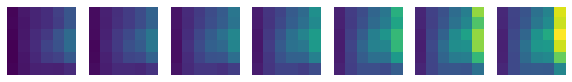

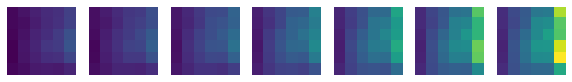

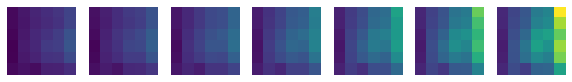

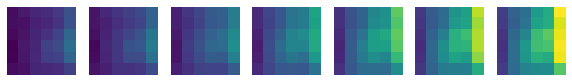

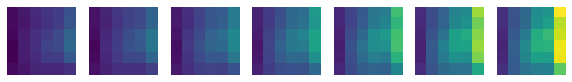

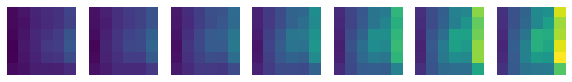

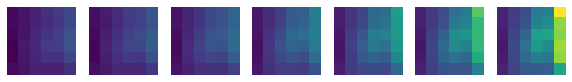

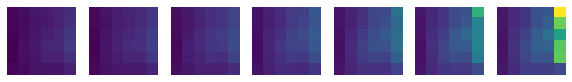

In [77]:
sc_opto = np.zeros((nwt,YY_opto_medium.shape[1],6,6))
for iwt in range(nwt):
    mag = 2
    for itype in range(1):
        plt.figure(figsize=(5*mag,mag))
        data = YY_opto_medium[iwt][:,:,:,itype].reshape((-1,6,6,Niter))
        data = np.nanmean(data[:,:,:,:],-1)
        slc = slice(2,-2)
        data = data[slc] #- data[5:6]
        sc_opto[iwt,slc] = data
        nopto = data.shape[0]
        for iopto in range(nopto):
            plt.subplot(1,nopto,iopto+1)
            plt.imshow(data[iopto],vmin=data.min(),vmax=data.max())
            plt.axis('off')

In [78]:
YY_opto_medium.shape

(54, 11, 36, 101, 8)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


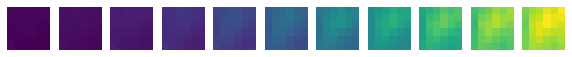

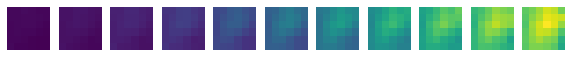

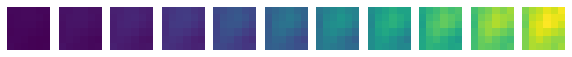

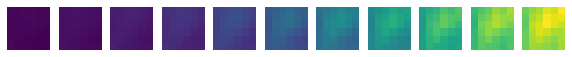

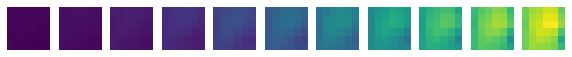

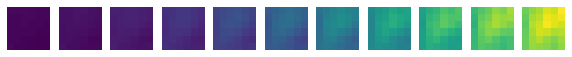

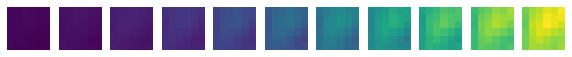

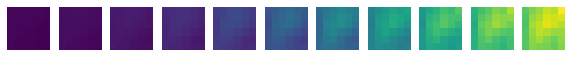

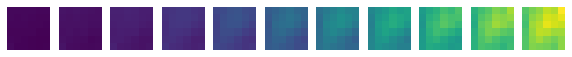

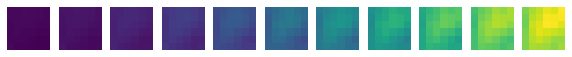

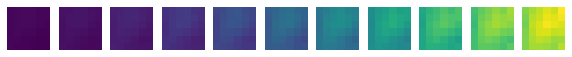

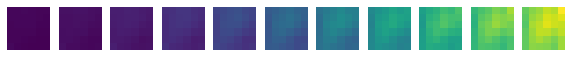

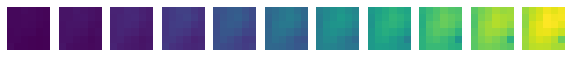

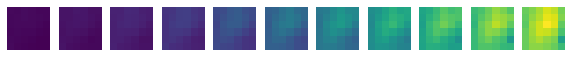

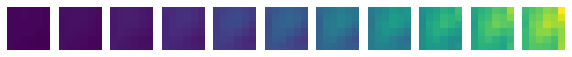

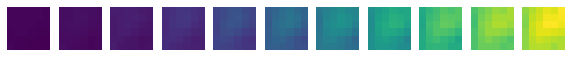

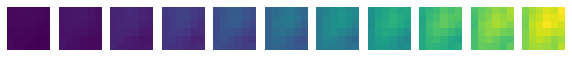

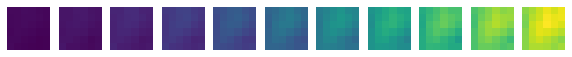

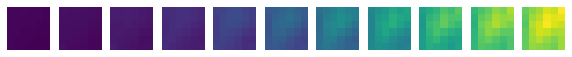

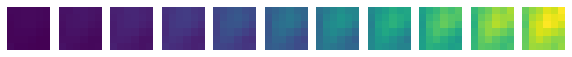

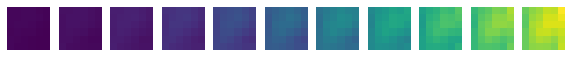

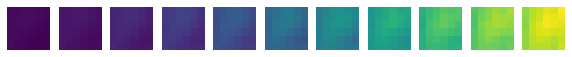

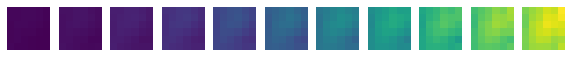

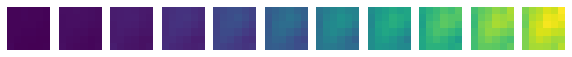

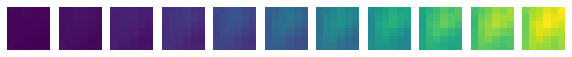

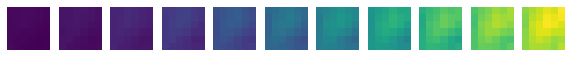

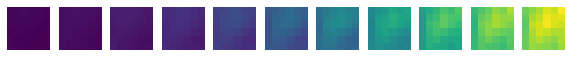

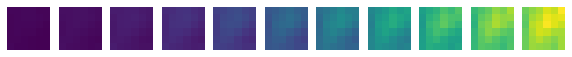

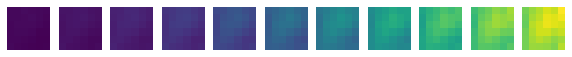

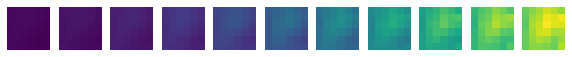

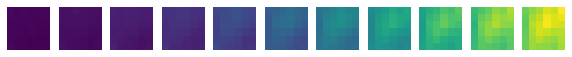

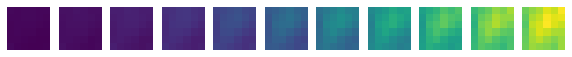

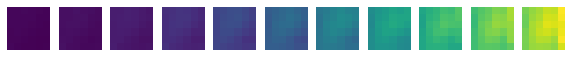

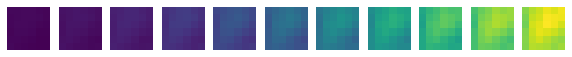

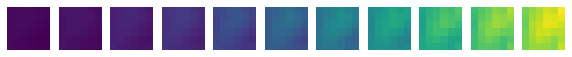

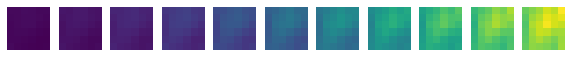

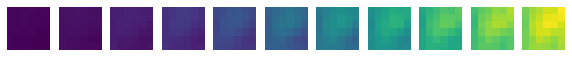

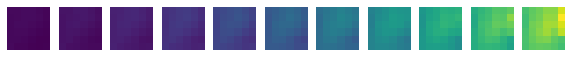

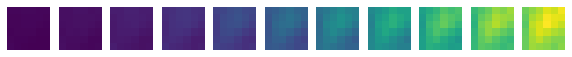

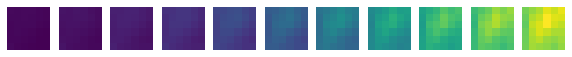

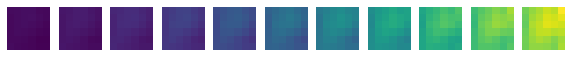

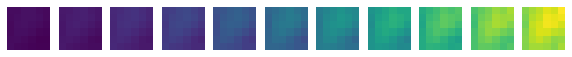

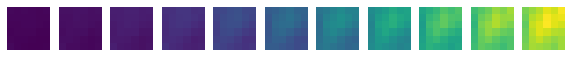

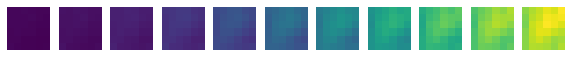

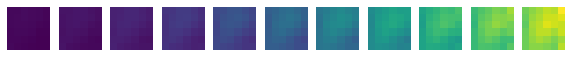

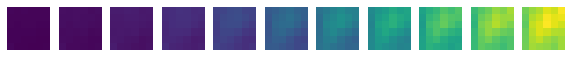

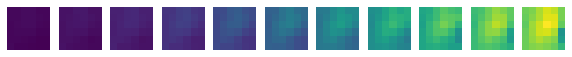

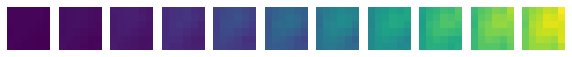

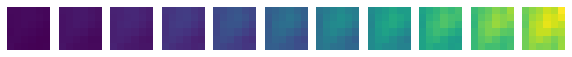

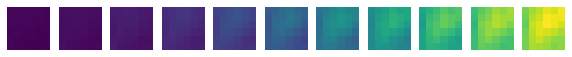

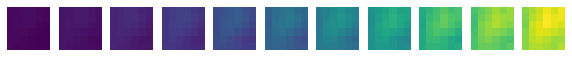

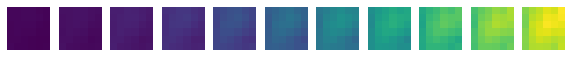

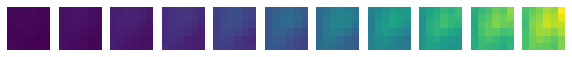

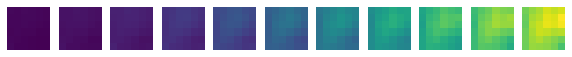

In [80]:
sc_opto = np.zeros((nwt,YY_opto_medium.shape[1],6,6))
for iwt in range(nwt):
    mag = 2
    for itype in range(2,3):
        plt.figure(figsize=(5*mag,mag))
        data = YY_opto_medium[iwt][:,:,:,itype].reshape((-1,6,6,Niter))
        data = np.nanmean(data[:,:,:,:],-1)
        data = data #- data[5:6]
        sc_opto[iwt] = data
        nopto = data.shape[0]
        for iopto in range(nopto):
            plt.subplot(1,nopto,iopto+1)
            plt.imshow(data[iopto],vmin=data.min(),vmax=data.max())
            plt.axis('off')

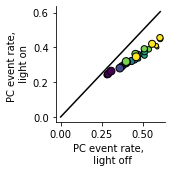

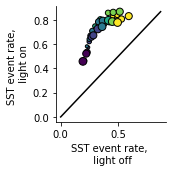

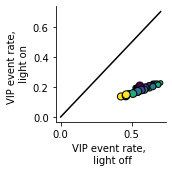

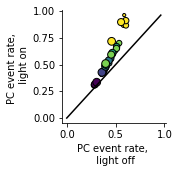

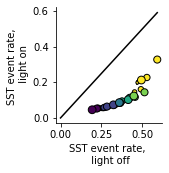

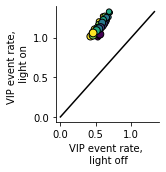

In [109]:
reload(ut)
reload(sca)
lbls = ['PC','SST','VIP','PV']
opto_lbls = ['halo','chrimson']
nopto = len(opto_levels)
ncelltypes = YY_opto_medium[0].shape[-1]
YY_opto_tavg = np.zeros((nwt,nopto,6,6,ncelltypes))
for iwt in range(nwt):
    YY_opto_tavg[iwt] = np.nanmean(YY_opto_medium[iwt][:,:,:,:],2).reshape((nopto,6,6,ncelltypes))
iwt = -1
ilight1 = 5
for iilight2,ilight2 in enumerate([2,8]):
    for itype in range(3):
        plt.figure(figsize=(2.5,2.5))
        xdata = YY_opto_tavg[:,ilight1,:,:,itype]
        ydata = YY_opto_tavg[:,ilight2,:,:,itype]
        sca.scatter_size_contrast_errorbar(xdata,ydata,mn=0)
        ut.erase_top_right()
#         ut.zero_origin('xy')
        plt.xlabel('%s event rate, \n light off'%lbls[itype])
        plt.ylabel('%s event rate, \n light on'%lbls[itype])
        plt.tight_layout()
        plt.savefig('figures/finite_%s_%s_scatter_light_on_light_off.eps'%(opto_lbls[iilight2],lbls[itype]))

In [112]:
np.save('../shared_data/opto_sim_data.npy',{'YY_opto':YY_opto_tavg})

In [ ]:
plt.save

In [99]:
'a' in 'ab'

True

(11, 36, 101, 8)

In [ ]:
plt.figure()
sca.scatter_size_contrast(YY_opto_medium[-1][:,:,:,])

In [48]:
usize = np.array([5,8,13,22,36,60])
ucontrast = np.array([0,6,12,25,50,100])

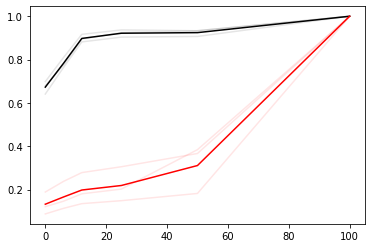

In [49]:
ilights = [5,10]
colors = ['k','r']
isize = -1
plt.figure()
for ilight,color in zip(ilights,colors):
    data = np.nanmean(YY_opto_medium[:,ilight,:,:,0],2).reshape((-1,6,6))
    this_data = data[:,isize,:]/data[:,isize,:].max(1)[:,np.newaxis]
    plt.plot(ucontrast,this_data.T,c=color,alpha=0.1)
    plt.plot(ucontrast,np.mean(this_data,0),c=color)

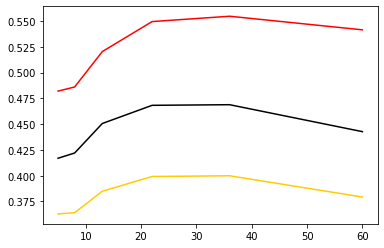

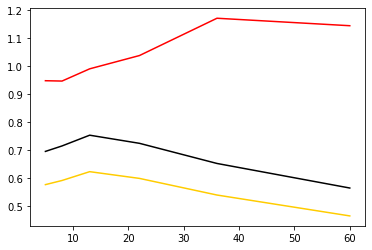

In [37]:
ilights = [1,5,9]
colors = [np.array((1,0.8,0)),'k','r']
nlights = len(ilights)
smi = np.zeros((YY_opto_medium.shape[0],nlights,6))
itype = 0
for iilight,ilight in enumerate(ilights):
    data = np.nanmean(YY_opto_medium[:,ilight,:,:,itype],2).reshape((-1,6,6))
    smi[:,iilight] = data[:,-1,:]/np.max(data,axis=1)
    
for icontrast in [1,5]:
    plt.figure()
    for ilight,color in zip(ilights,colors):
        data = np.nanmean(YY_opto_medium[:,ilight,:,:,itype],2).reshape((-1,6,6))
        this_data = data[:,:,icontrast]#/data[:,:,icontrast].max(1)[:,np.newaxis]
#         plt.plot(usize,this_data.T,c=color,alpha=0.1)
        plt.plot(usize,np.mean(this_data,0),c=color)

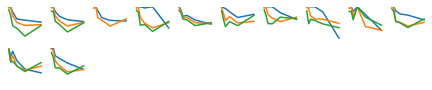

In [16]:
plt.figure(figsize=(7.5,7.5))
for iwt in range(nwt):
    plt.subplot(10,10,iwt+1)
    plt.plot(ucontrast,smi[iwt,:,:].T)
    plt.ylim((0.5,1))
    plt.axis('off')

In [17]:
plt.figure()
plt.plot(ucontrast,smi[68].T)

IndexError: index 68 is out of bounds for axis 0 with size 12

<Figure size 432x288 with 0 Axes>

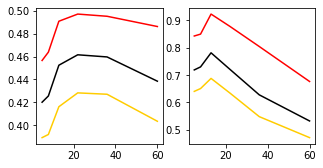

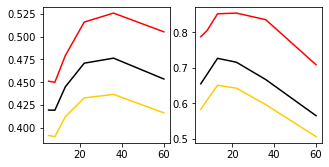

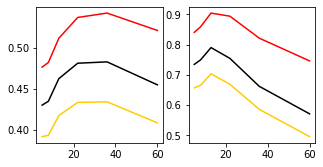

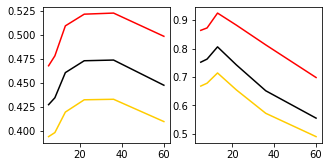

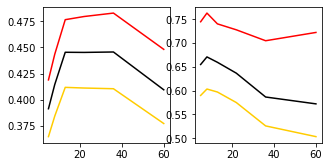

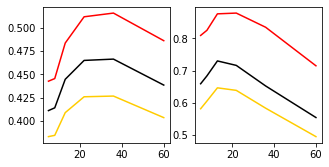

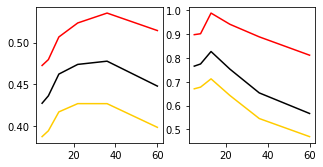

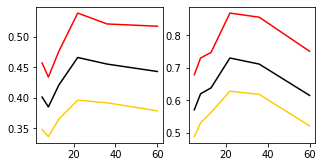

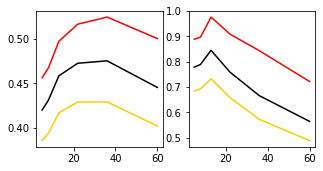

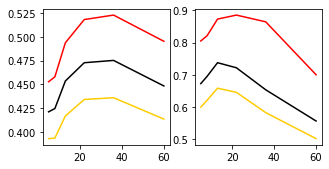

In [38]:
for iwt in range(nwt):
    ilights = [3,5,7]
    colors = [np.array((1,0.8,0)),'k','r']
    nlights = len(ilights)

    plt.figure(figsize=(5,2.5))
    for iicontrast,icontrast in enumerate([1,5]):
        plt.subplot(1,2,iicontrast+1)
        for ilight,color in zip(ilights,colors):
            data = np.nanmean(YY_opto_medium[iwt,ilight,:,:,itype],1).reshape((-1,6,6))
            this_data = data[:,:,icontrast]#/data[:,:,icontrast].max(1)[:,np.newaxis]
    #         plt.plot(usize,this_data.T,c=color,alpha=0.1)
            plt.plot(usize,np.nanmean(this_data,0),c=color)

In [43]:
np.nanmean(YY_opto_medium[:,:,:,:,itype],3).reshape((nwt,-1,6,6))[:,:,[0,2,3,5],:].shape

(10, 11, 4, 6)

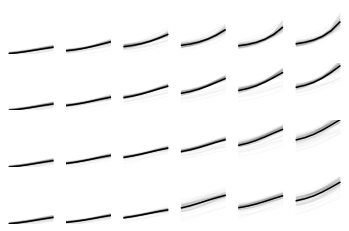

In [67]:
data = np.nanmean(YY_opto_medium[:,2:8,:,:,itype],3).reshape((nwt,-1,6,6))[:,:,[0,2,3,5],:]
nsize,ncontrast = 4,6
mn = np.nanmean(data,0).min()
mx = np.nanmean(data,0).max()
plt.figure()
for isize in range(nsize):
    for icontrast in range(ncontrast):
        plt.subplot(nsize,ncontrast,(nsize-isize-1)*ncontrast+icontrast+1)
        plt.plot(data[:,:,isize,icontrast].T,c='k',alpha=0.02)
        plt.plot(np.nanmean(data[:,:,isize,icontrast],0),c='k')
        plt.ylim((mn,mx))
        plt.axis('off')
plt.savefig('figures/vip_sim_master_plot.jpg',dpi=300)

In [177]:
YY_opto_medium[0,7,:,:,itype]

array([[0.49249911, 0.49249911, 0.49249911, ..., 0.49249911, 0.49249911,
        0.49249911],
       [0.54827048, 0.54827048, 0.54827048, ..., 0.54827048, 0.54827048,
        0.54827048],
       [0.60918797, 0.60918797, 0.60918797, ..., 0.60918797, 0.60918797,
        0.60918797],
       ...,
       [0.7447089 , 0.7447089 , 0.7447089 , ..., 0.7447089 , 0.7447089 ,
        0.7447089 ],
       [0.73623515, 0.73623515, 0.73623515, ..., 0.73623515, 0.73623515,
        0.73623515],
       [0.75386399, 0.75386399, 0.75386399, ..., 0.75386399, 0.75386399,
        0.75386399]])

In [143]:
# for iwt in range(nwt):
#     plt.figure()
#     for ilight,isize,icontrast in zip([0,5,10],[4,4,4],[5,5,5]):
#         tmax = Niter
#         t = np.arange(tmax)*dt
#         iflat = np.ravel_multi_index((isize,icontrast),(nsize,ncontrast))
#         plt.plot(t,YY_opto[iwt][ilight,iflat,:tmax,0].T)

In [168]:
np.nanmax(data)

0.0

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


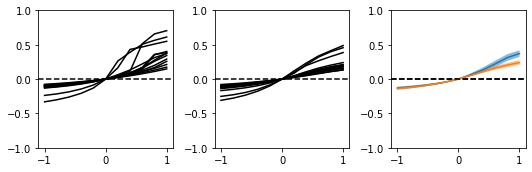

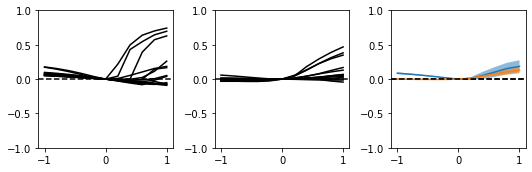

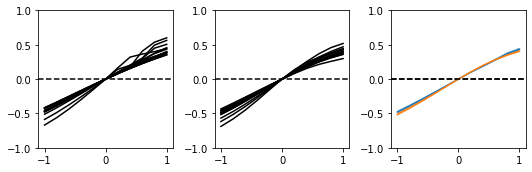

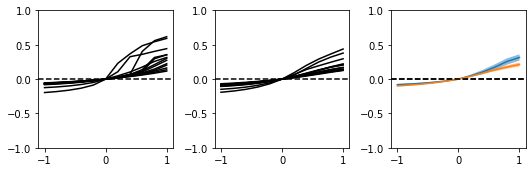

In [234]:
iwt = 0
data = np.zeros((nwt,YY_opto_medium[0].shape[0],6,6))
these_lvls = slice(None)
for itype in [0,1,2,3]:
    plt.figure(figsize=(7.5,2.5))
    isize = 3
    tlast = 1000
    icontrasts = [1,5]
    for iwt in range(nwt):
        data[iwt] = np.nanmean(YY_opto_medium[iwt][:,:,:,itype],2).reshape((-1,6,6)) # light, stim, time, type
        data[iwt] = (data[iwt] - data[iwt,5])/(data[iwt] + data[iwt,5])
    for iicontrast,icontrast in enumerate(icontrasts):
        this_data = data[:,:,isize,icontrast]
        plt.subplot(1,3,iicontrast+1)
        for iwt in range(nwt):
            plt.plot(opto_levels[these_lvls],this_data[iwt][these_lvls],c='k',alpha=1)
        plt.plot(opto_levels[these_lvls],np.mean(this_data,0)[these_lvls],c='k')
        plt.ylim((np.nanmin(data[:,:,isize,icontrasts]),np.nanmax(data[:,:,isize,icontrasts])))
        plt.axhline(0,c='k',linestyle='dashed')
        plt.ylim(-1,1)
        plt.subplot(1,3,3)
        mn = np.mean(this_data,0)[these_lvls]
        sem = np.std(this_data,0)[these_lvls]/np.sqrt(this_data.shape[0])
        plt.plot(opto_levels[these_lvls],mn)
        plt.fill_between(opto_levels[these_lvls],mn-sem,mn+sem,alpha=0.5)
        plt.ylim((np.nanmin(data[:,:,isize,icontrasts]),np.nanmax(data[:,:,isize,icontrasts])))
        plt.axhline(0,c='k',linestyle='dashed')
        plt.ylim(-1,1)
    plt.tight_layout()

In [136]:
non_paradoxical = (YY_opto_small[:,10,:,1] - YY_opto_small[:,5,:,1]>0).sum(1) == 0

In [ ]:
iwt,ilight = 0,-1
thisYY = np.nanmean(YY_opto[iwt,:,:,:],2)
mdls[0].fprimeY(thisYY).shap

In [160]:
YY_opto.shape

(10, 11, 36, 10001, 16)

In [162]:
this_fprime = mdls[0].fprimeY(np.nanmean(YY_opto[iwt],2))
this_fprime.shape

(11, 36, 16)

In [84]:
nlight = YY_opto_medium.shape[1]
nN,nP,nQ,nS,nT = [getattr(mdls[0],x) for x in ['nN','nP','nQ','nS','nT']]
phis = np.zeros((nwt,nlight,6,6,nQ*nS*nT))
couplings = np.zeros((nwt,nlight,6,6,nQ*nS*nT,nQ*nS*nT))
Xcouplings = np.zeros((nwt,nlight,6,6,nP*nS*nT,nQ*nS*nT))
for iwt,mdl in enumerate(mdls[:nwt]):
    print('model #%d'%iwt)
    this_fprime = mdl.fprimeY(np.nanmean(YY_opto_medium[iwt],2))
    WWmx,WWmy = [getattr(mdls[iwt],x) for x in ['WWmx','WWmy']]
    for ilight in range(nlight):
        for istim in range(nN):
            iistim,jjstim = np.unravel_index(istim,(6,6))
            phis[iwt,ilight,iistim,jjstim] = this_fprime[ilight,istim]
            Phi = np.diag(phis[iwt,ilight,iistim,jjstim])
            couplings[iwt,ilight,iistim,jjstim] = Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
            Xcouplings[iwt,ilight,iistim,jjstim] = WWmx @ Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
# couplings = np.reshape(couplings,(couplings.shape[0],6,6,couplings.shape[2],couplings.shape[3]))
# Xcouplings = np.reshape(Xcouplings,(Xcouplings.shape[0],6,6,Xcouplings.shape[2],Xcouplings.shape[3]))


model #0
model #1
model #2
model #3
model #4
model #5
model #6
model #7
model #8
model #9
model #10
model #11
model #12
model #13
model #14
model #15
model #16
model #17
model #18
model #19
model #20
model #21
model #22
model #23
model #24
model #25
model #26
model #27
model #28
model #29
model #30
model #31
model #32
model #33
model #34
model #35
model #36
model #37
model #38
model #39
model #40
model #41
model #42
model #43
model #44
model #45
model #46
model #47
model #48
model #49
model #50
model #51
model #52
model #53
model #54
model #55
model #56
model #57
model #58
model #59
model #60
model #61
model #62
model #63
model #64
model #65
model #66
model #67
model #68
model #69
model #70
model #71
model #72
model #73
model #74
model #75
model #76
model #77
model #78
model #79
model #80
model #81
model #82
model #83
model #84
model #85
model #86
model #87
model #88
model #89
model #90
model #91
model #92
model #93
model #94
model #95
model #96
model #97
model #98
model #99
model #100

In [85]:
lbls = ['PC','SST','VIP','PV']

In [86]:
iwt = 1

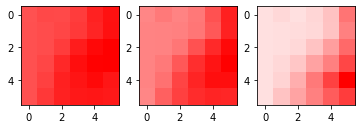

In [87]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[iwt,5*ilight,:,:,1,1]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

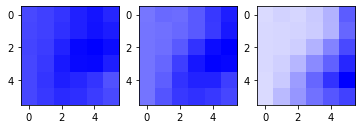

In [88]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[iwt,5*ilight,:,:,2,1]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

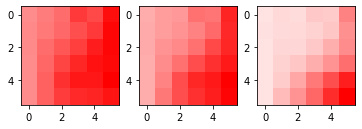

In [89]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[iwt,5*ilight,:,:,2,0]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

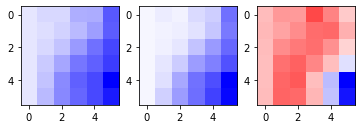

In [104]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[1,5*ilight,:,:,8,0]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


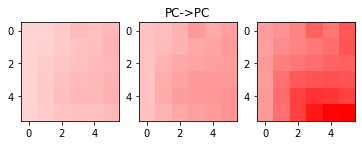

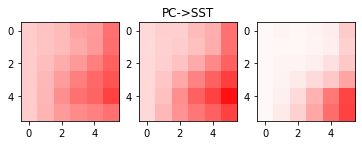

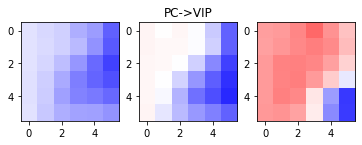

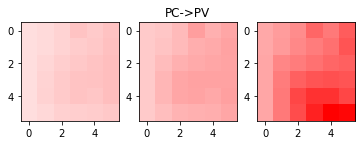

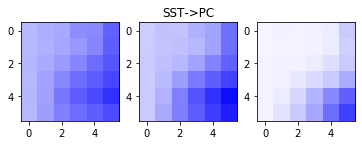

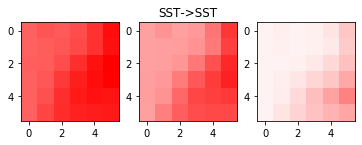

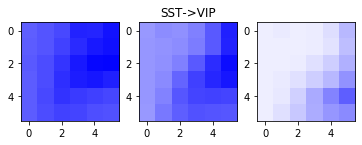

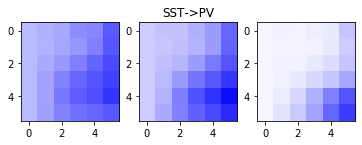

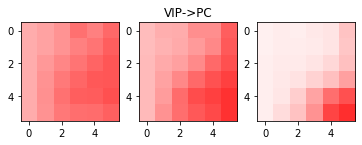

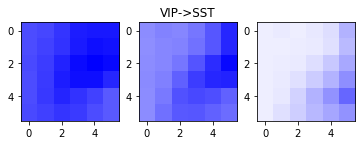

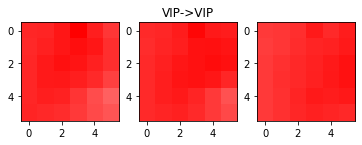

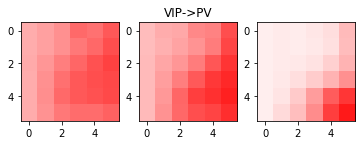

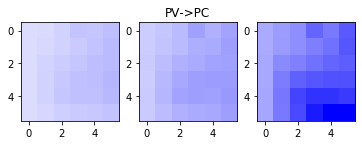

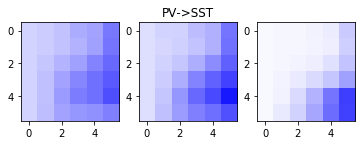

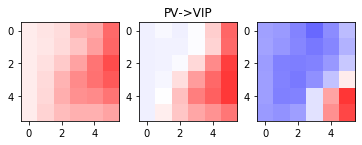

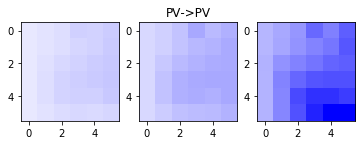

In [93]:
for itype1 in range(nQ):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(couplings[:,:,:,:,itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5*ilight]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('%s->%s'%(lbls[itype1],lbls[itype2]))

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


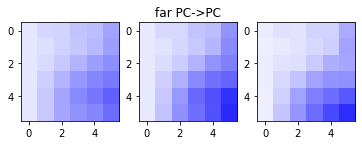

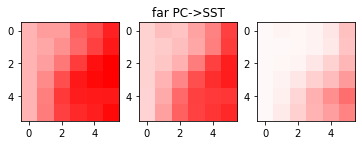

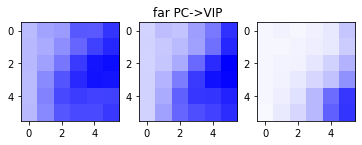

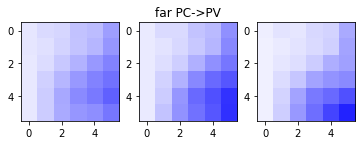

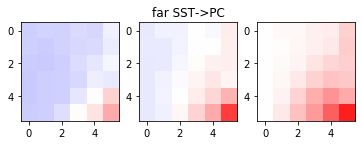

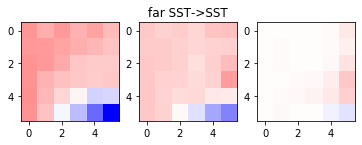

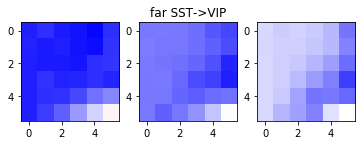

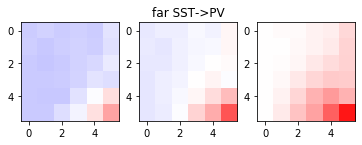

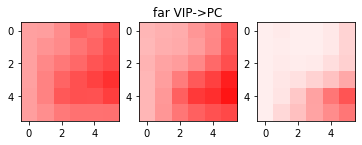

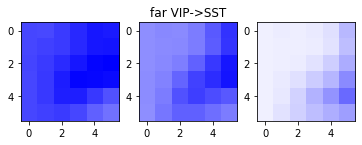

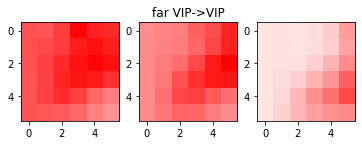

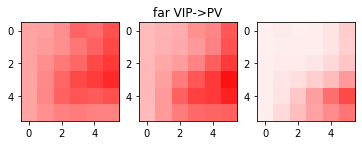

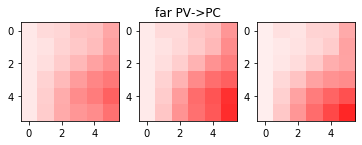

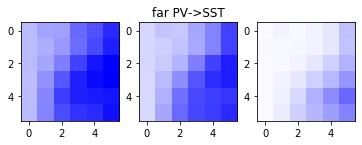

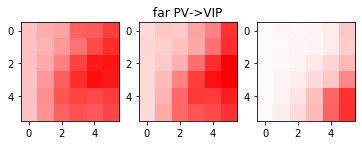

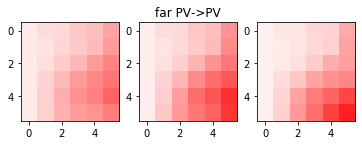

In [97]:
for itype1 in range(nQ):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(couplings[:,:,:,:,8+itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5*ilight]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('far %s->%s'%(lbls[itype1],lbls[itype2]))

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


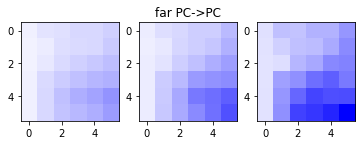

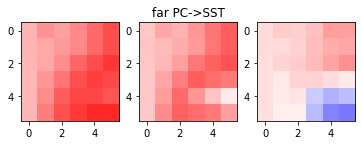

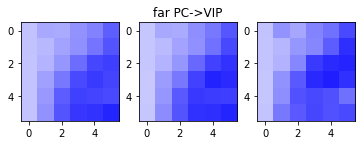

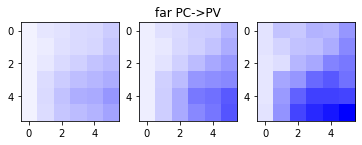

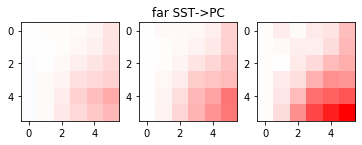

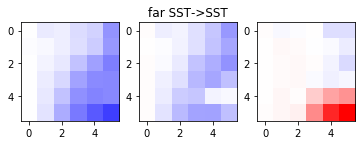

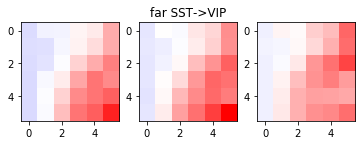

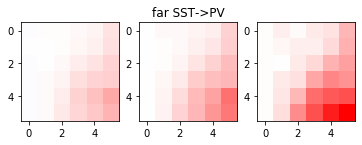

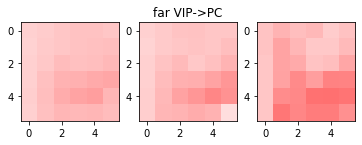

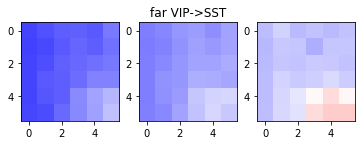

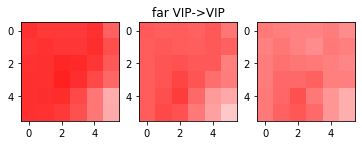

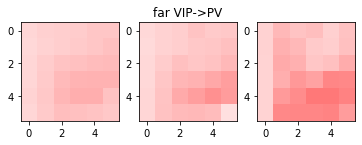

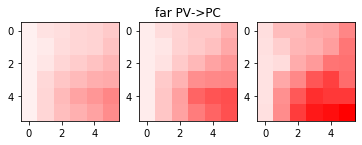

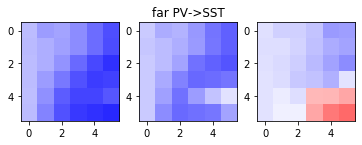

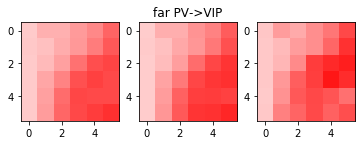

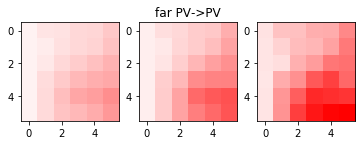

In [133]:
for itype1 in range(nQ):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(couplings[:,:,:,:,8+itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5+2*(ilight-1)]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('far %s->%s'%(lbls[itype1],lbls[itype2]))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


-0.29041152623994315


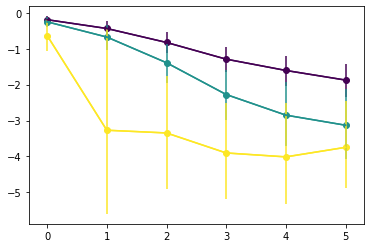

In [134]:
plt.figure()
isize = 4
x = np.arange(6)
ut.plot_bootstrapped_errorbars_hillel(x,couplings[:,[3,5,7],isize,:,8,0].transpose((1,0,2)))

In [236]:
nlight = YY_opto_medium.shape[1]
nsize,ncontrast = 6,6
nN,nP,nQ,nS,nT = [getattr(mdls[0],x) for x in ['nN','nP','nQ','nS','nT']]
max_eig = np.zeros((len(weights_files),nlight,nsize,ncontrast))
min_eig = np.zeros((len(weights_files),nlight,nsize,ncontrast))
vs = np.zeros((len(weights_files),nlight,nsize,ncontrast,2,2))
for iwt,mdl in enumerate(mdls[:nwt]):
    print('model #%d'%iwt)
    this_fprime = mdl.fprimeY(np.nanmean(YY_opto_medium[iwt],2))
    Wmy = getattr(mdls[iwt],'Wmy')
    for ilight in range(nlight):
        Weff = np.zeros((nsize,ncontrast,2,2))
        for istim in range(nN):
            iistim,jjstim = np.unravel_index(istim,(nsize,ncontrast))
            these_phis = this_fprime[ilight,istim]
            Phi = np.diag(these_phis)
            Weff[iistim,jjstim] = Wmy[[0,3]][:,[0,3]] @ Phi[[0,3]][:,[0,3]]
        for istim in range(nN):
            iistim,jjstim = np.unravel_index(istim,(nsize,ncontrast))
    #         plt.subplot(nsize,ncontrast,istim+1)
    #         plt.imshow(Weff[iistim,jjstim],vmin=Weff.min(),vmax=Weff.max())
            w,v = np.linalg.eig(Weff[iistim,jjstim].T)
            vs[iwt,ilight,iistim,jjstim] = v[:,np.argsort(w)]
            max_eig[iwt,ilight,iistim,jjstim] = np.max(w)
            min_eig[iwt,ilight,iistim,jjstim] = np.min(w)

model #0
model #1
model #2


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


model #3
model #4
model #5
model #6
model #7
model #8
model #9
model #10
model #11


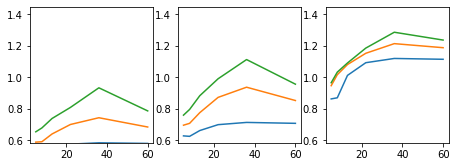

In [237]:
iwt = 0
usize = np.array([5,8,13,22,36,60])
plt.figure(figsize=(7.5,2.5))
for isize in range(3):
    plt.subplot(1,3,isize+1)
    plt.plot(usize,np.nanmean(max_eig[:,1+4*isize][:,:,[1,3,5]],0))
    plt.ylim((max_eig[iwt].min(),max_eig[iwt].max()))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

1.0145685939215443
0.8916807709116606
1.0797529009057312


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


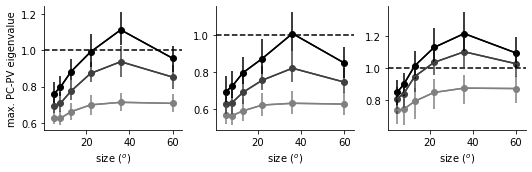

In [238]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_l23 = np.array(((0.5,0.5,0.5),(0.25,0.25,0.25),(0.,0.,0.)))
for iilight,ilight in enumerate([5,3,7]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,max_eig[:,ilight][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_l23)
    plt.axhline(1,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    # plt.legend(['6%','25%','100%'])
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
#     plt.ylim((0.4,1.3))
plt.subplot(1,3,1)
plt.ylabel('max. PC-PV eigenvalue')

plt.tight_layout()
# plt.savefig('figures/pc_pv_stability_size_by_3_contrasts_by_vip_opto.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


-0.37362518360617425
-0.5689124882643577


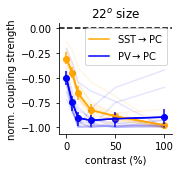

In [239]:
plt.figure(figsize=(2.5,2.5))
isize = 3
ilight = 5
datas = [couplings[:,ilight,isize,:,1,0],couplings[:,ilight,isize,:,3,0]]
colors = [np.array((1,0.65,0)),np.array((0,0,1))]
for data,color in zip(datas,colors):
    mx = np.max(np.abs(data),axis=1)[:,np.newaxis]
    ut.plot_bootstrapped_errorbars_hillel(ucontrast,(data/mx)[:,np.newaxis],pct=(2.5,97.5),colors=color[np.newaxis])
plt.legend([r'SST$\rightarrow$PC',r'PV$\rightarrow$PC'])
for data,color in zip(datas,colors):
    mx = np.max(np.abs(data),axis=1)[:,np.newaxis]
    plt.plot(ucontrast,(data/mx).T,alpha=0.1,c=color)
plt.xlabel('contrast (%)')
plt.ylabel('norm. coupling strength')
plt.title('%d$^o$ size'%usize[isize])
plt.axhline(0,linestyle='dashed',c='k')
ut.erase_top_right()
plt.tight_layout()
# plt.savefig('figures/sst_pc_coupling_traces.jpg',dpi=300)

In [240]:
max_eig[:,3+2*isize,:,[1,3,5]].shape

(3, 12, 6)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


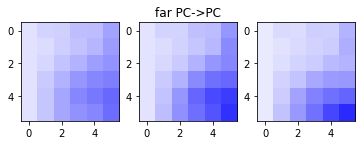

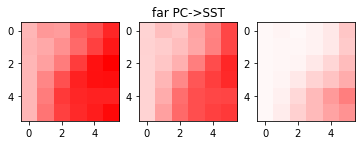

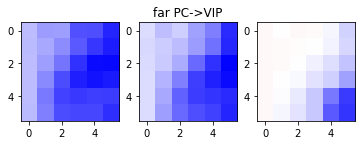

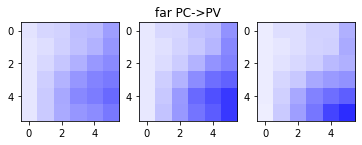

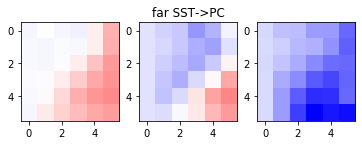

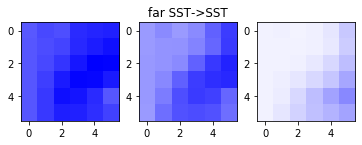

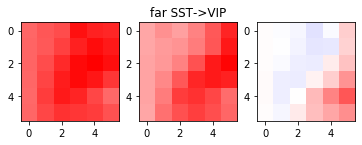

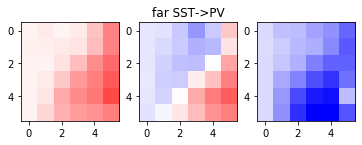

In [125]:
for itype1 in range(nP):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(Xcouplings[:,:,:,:,4+itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5*ilight]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('far %s->%s'%(lbls[itype1],lbls[itype2]))

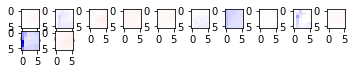

In [253]:
plt.figure()
mx = np.max(np.abs(couplings[:,10,:,:,1,1]))
for iwt in range(nwt):
    plt.subplot(10,10,iwt+1)
    plt.imshow(couplings[iwt,10,:,:,1,1],vmin=-mx,vmax=mx,cmap='bwr')
#     plt.axis('off')
cp = couplings.reshape((nwt,-1))
lkat = np.ones((nwt,),dtype='bool')
# lkat = np.max(np.abs(cp),axis=1)<50

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.33952617519641554
0.22530867720703426
-0.16359281323725525


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


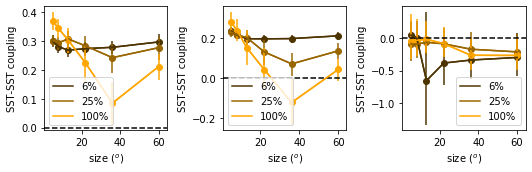

In [243]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[:,1+4*ilight,:,:,1,1][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_sst)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('SST-SST coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/sst_sst_coupling_size_by_3_contrasts_by_3_light_levels.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.7392399859517991
0.8049114596481154


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.9204735168743363


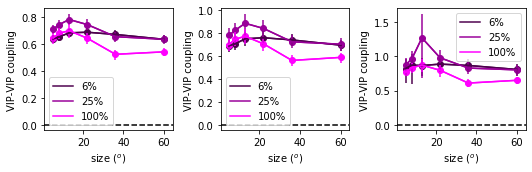

In [244]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[lkat,3+2*ilight,:,:,2,2][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_vip)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-VIP coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/vip_sst_coupling_size_by_3_contrasts_by_3_light_levels.eps')

NameError: name 'lkat' is not defined

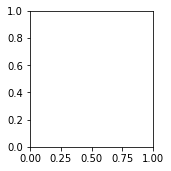

In [116]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[lkat,1+4*ilight,:,:,2,1][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_vip)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-SST coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/vip_sst_coupling_size_by_3_contrasts_by_3_light_levels.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

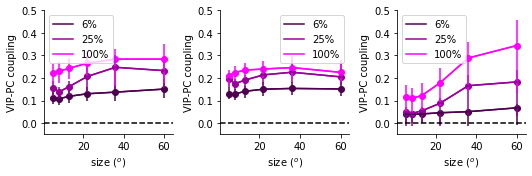

In [122]:
reload(ut)
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_pct_errorbars_hillel(usize,couplings[:,ilight,:,:,2,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(16,84),colors=c_vip)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-PC coupling')
    plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.tight_layout()
    plt.ylim(-0.05,0.5)
# plt.savefig('figures/vip_pc_coupling_size_by_3_contrasts_by_3_light_levels.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

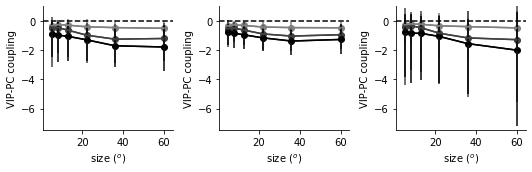

In [120]:
reload(ut)
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_pct_errorbars_hillel(usize,couplings[:,ilight,:,:,8,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(16,84),colors=c_l23)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-PC coupling')
#     plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.tight_layout()
    plt.ylim(-7.5,1)
# plt.savefig('figures/vip_pc_coupling_size_by_3_contrasts_by_3_light_levels.eps')

In [151]:
sc = YY_opto_small.reshape(YY_opto_small.shape[:2]+(6,6,-1))

In [152]:
smi = sc[:,:,-1,1:,0]/np.max(sc[:,:,:,1:,0],axis=2)

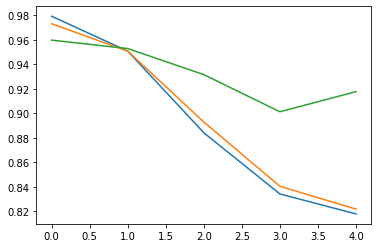

In [153]:
plt.figure()
for ilight in [5,1,9]:
    plt.plot(np.nanmean(smi[:,ilight,:],0))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.7278878753225566
0.6141257398117157


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


1.0227992465695759


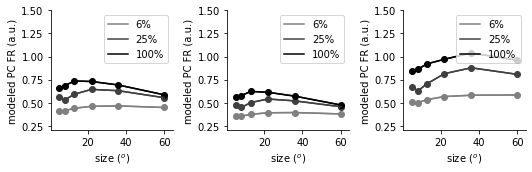

In [123]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,YY_opto_small[:,ilight,:,0].reshape((-1,6,6))[:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_l23)
#     plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('modeled PC FR (a.u.)')
    plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.ylim(0.2,1.5)
plt.tight_layout()
# plt.savefig('figures/modeled_pc_size_by_3_contrasts_by_3_light_levels.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.595975275563359
0.13255265470553373
1.3652119077072997


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


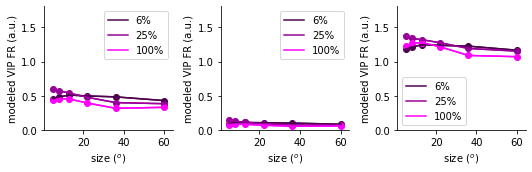

In [124]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,YY_opto_small[:,ilight,:,2].reshape((-1,6,6))[:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_vip)
#     plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('modeled VIP FR (a.u.)')
    plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.tight_layout()
    plt.ylim(0.,1.8)
# plt.savefig('figures/modeled_vip_size_by_3_contrasts_by_3_light_levels.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.7550497002352771
0.6076441236465289
0.9027097557828473


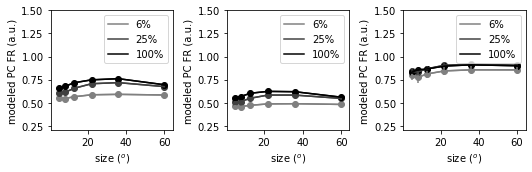

In [156]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,phis[:,ilight,:,:,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_l23)
#     plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('modeled PC FR (a.u.)')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
    plt.ylim(0.2,1.5)
# plt.savefig('figures/modeled_pc_size_by_3_contrasts_by_3_light_levels.eps')

In [284]:
phis.shape

(84, 11, 6, 6, 16)

In [207]:
couplings.shape

(84, 6, 6, 16, 16)

In [106]:
c_l4 = np.array(((0,0.3,0),(0,0.6,0),(0,1,0)))
c_l23 = np.array(((0.5,0.5,0.5),(0.25,0.25,0.25),(0.,0.,0.)))
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
c_vip = np.array(((0.3,0,0.3),(0.6,0,0.6),(1,0,1)))
c_pv = np.array(((0,0,0.3),(0,0,0.6),(0,0,1)))
colors = [c_l4,c_l23,c_sst,c_vip,c_pv]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

-0.17511181108702614
-0.18437305227692252


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


-0.9199933930828017


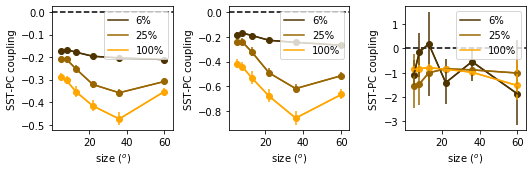

In [248]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[lkat,5*ilight,:,:,1,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_sst)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('SST-PC coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/sst_sst_coupling_size_by_3_contrasts.eps')

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


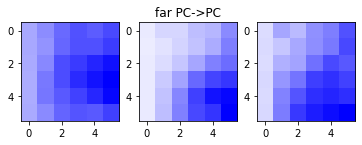

In [100]:
for itype1 in range(8,9):
    for itype2 in range(0,1):
        plt.figure()
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            data = np.nanmedian(couplings[:,5*ilight,:,:,itype1,itype2],0)
            mx = np.max(np.abs(data))
            plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('%s->%s'%('far PC',lbls[itype2]))

In [26]:
ucontrast = np.array([0,6,12,25,50,100])

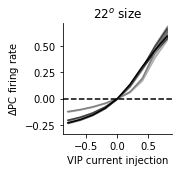

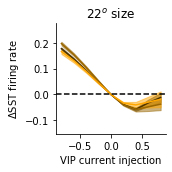

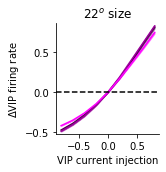

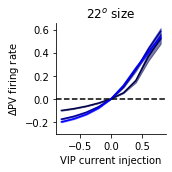

In [96]:
iwt = 0
data = np.zeros((nwt,YY_opto_medium[0].shape[0],6,6))
yoffset = 0.1
opto_range = slice(1,10)
these_opto_levels = opto_levels[opto_range]
for itype in [0,1,2,3]:
    plt.figure(figsize=(2.5,2.5))
    isize = 3
    tlast = 200
    icontrasts = [1,3,5]
    these_colors = colors[itype+1]
    for iwt in range(nwt):
        data[iwt] = np.nanmean(YY_opto_medium[iwt][:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
        data[iwt] = (data[iwt] - data[iwt,5])#/(data[iwt] + data[iwt,5])
    for iicontrast,icontrast in enumerate(icontrasts):
        this_data = data[:,:,isize,icontrast]
        this_color = these_colors[iicontrast]
        mn = np.mean(this_data,0)[opto_range]
        sem = np.std(this_data,0)[opto_range]/np.sqrt(this_data.shape[0])
        plt.plot(these_opto_levels,mn,c=this_color)
        plt.fill_between(these_opto_levels,mn-sem,mn+sem,alpha=0.5,color=this_color)
        plt.ylim(((mn-sem-yoffset).min(),(mn+sem+yoffset).max()))
#     plt.legend(['%d%% contrast'%uc for uc in ucontrast[icontrasts]])
    plt.title('%d$^o$ size'%usize[isize])
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xlabel('VIP current injection')
    plt.ylabel('$\Delta$%s firing rate'%lbls[itype])
    ut.erase_top_right()
    plt.tight_layout()
    plt.savefig('figures/%s_vip_current_injection.jpg'%lbls[itype],dpi=300)

In [203]:
import calnet.utils
import sim_utils

In [69]:
nfiles = nwt#len(weights_files)
Ts = np.zeros((nfiles,nQ))
Ks = np.zeros((nfiles,nQ))
Wmys = np.zeros((nfiles,nQ,nQ))
Wmxs = np.zeros((nfiles,nP,nQ))
s02s = np.zeros((nfiles,nQ))
YYs = np.zeros((nfiles,6,6,nQ*nS*nT))
XXs = np.zeros((nfiles,6,6,nP*nS*nT))
couplings = np.zeros((nfiles,6,6,nQ*nS*nT,nQ*nS*nT))
Xcouplings = np.zeros((nfiles,6,6,nP*nS*nT,nQ*nS*nT))
for iwt,weights_file in enumerate(weights_files):
    Wstar_dict = np.load(weights_file,allow_pickle=True)[()]
    Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h = Wstar_dict['as_list']
    WWmy = calnet.utils.gen_Weight_k_kappa_t(Wmy,K,kappa,T)
    WWmx = calnet.utils.gen_Weight_k_kappa_t(Wmx,K,kappa,T)
    tiled_s02 = np.tile(s02,nS*nT)
    Ts[iwt] = T
    Ks[iwt] = K
    Wmys[iwt] = Wmy
    Wmxs[iwt] = Wmx
    s02s[iwt] = s02
    YYs[iwt] = sim_utils.f_miller_troyer(Eta,Xi**2+tiled_s02).reshape((6,6,nQ*nS*nT))
    XXs[iwt] = XX.reshape((6,6,nP*nS*nT))
    for istim in range(nN):
        iistim,jjstim = np.unravel_index(istim,(6,6))
        Phi = np.diag(calnet.utils.fprime_miller_troyer(Eta[istim],Xi[istim]**2+tiled_s02))
        couplings[iwt,iistim,jjstim] = Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
        Xcouplings[iwt,iistim,jjstim] = WWmx @ Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
# couplings = np.reshape(couplings,(couplings.shape[0],6,6,couplings.shape[2],couplings.shape[3]))
# Xcouplings = np.reshape(Xcouplings,(Xcouplings.shape[0],6,6,Xcouplings.shape[2],Xcouplings.shape[3]))

NameError: name 'nQ' is not defined

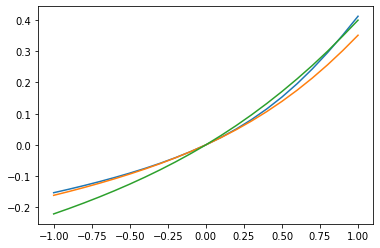

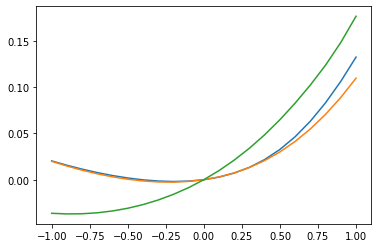

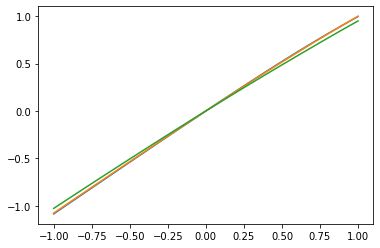

In [277]:
for itype in [0,1,2]:
    plt.figure()
    isize = 5
    tlast = 1000
    data = np.nanmean(YY_opto[:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
    for icontrast in [1,3,5]:
        plt.plot(opto_levels,data[:,isize,icontrast]-data[10,isize,icontrast])

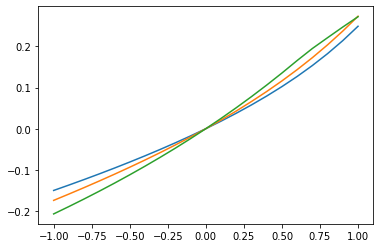

In [191]:
plt.figure()
itype = 0
isize = 2
tlast = 1000
data = np.nanmean(YY_opto[:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
for icontrast in [1,3,5]:
    plt.plot(opto_levels,data[:,isize,icontrast]-data[10,isize,icontrast])

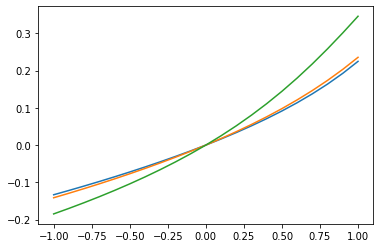

In [193]:
plt.figure()
itype = 0
isize = 5
tlast = 1000
data = np.nanmean(YY_opto[:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
for icontrast in [1,3,5]:
    plt.plot(opto_levels,data[:,isize,icontrast]-data[10,isize,icontrast])

In [13]:
pdb.pm()


> /Users/dan/Documents/code/adesnal/calnet/dynamics.py(142)predict_YY_current_injection()
-> YY = np.zeros((Niter+1,YY0.shape[1]))
(Pdb) Nfix
*** NameError: name 'Nfix' is not defined
(Pdb) YY0.shape
(16,)
(Pdb) exit


In [215]:
reload(dyn)
YY_fix = dyn.compute_steady_state_Model(mdl,Niter=int(1.5e3),fix_dim=np.arange(mdl.nQ),Ny=25,dt=1e-1)

0


/Users/dan/Documents/code/adesnal/calnet/utils.py:632: RuntimeWarning: overflow encountered in square
  A = 0.5*mu*(1+ssp.erf(u))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


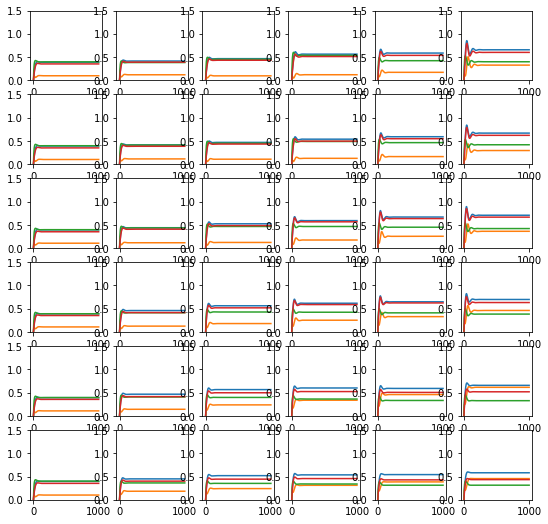

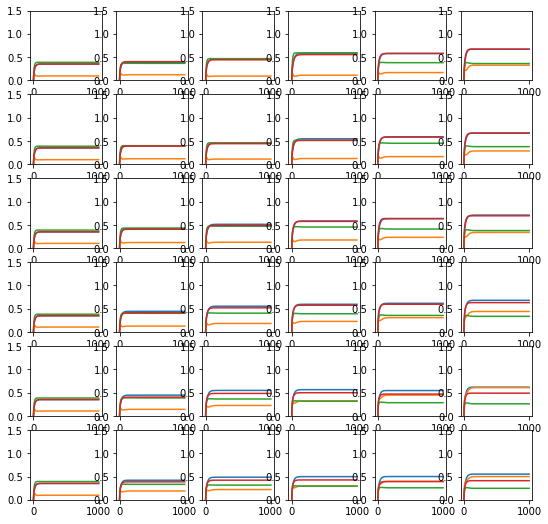

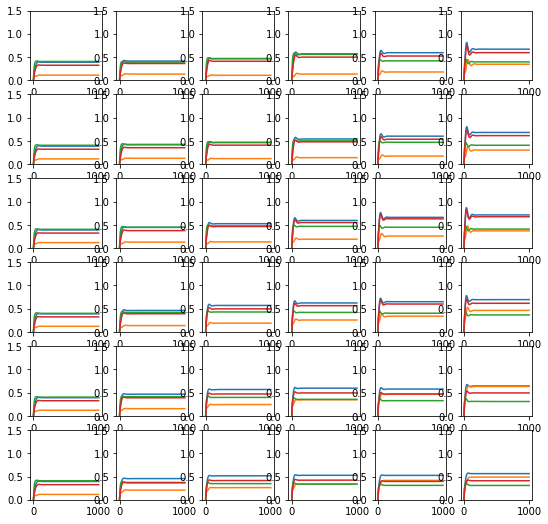

In [50]:
import pyute as ut
# ut.mkdir('figures/dynamics_simulations/200724a/')
for iwt in range(nwt):
    mag = 1.5
    plt.figure(figsize=(6*mag,6*mag))
    for icelltype in range(4):
        for istim in range(36):
            plt.subplot(6,6,istim+1)
            plt.plot(YY_ss[iwt][istim,:,icelltype]) #-YY_ss[imodel][istim,-1,icelltype])
            plt.ylim((0,1.5))
#     plt.savefig('figures/dynamics_simulations/200724a/%d.jpg'%iwt)

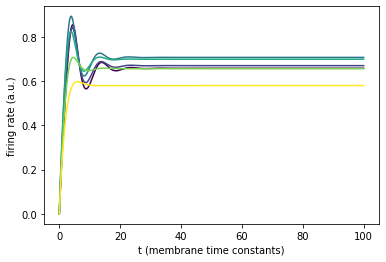

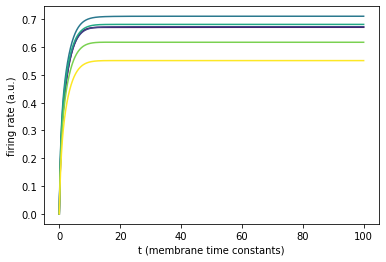

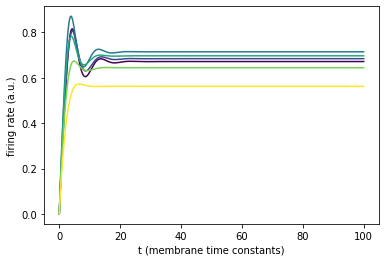

In [51]:
colors = plt.cm.viridis(np.linspace(0,1,6))
ut.mkdir('figures/dynamics_simulations_inset')
for iwt in range(nwt):
    plt.figure()
    tlim = 1001
    t = np.arange(tlim)*dt
    data = YY_ss[iwt].reshape((6,6)+YY_ss[iwt].shape[1:])
    itype = 0
    icontrast = 5
    for isize in np.arange(6):
        plt.plot(t,data[isize,icontrast,:tlim,itype],c=colors[isize])
    plt.xlabel('t (membrane time constants)')
    plt.ylabel('firing rate (a.u.)')
#     plt.savefig('figures/dynamics_simulations_inset/%d.jpg'%iwt)

In [52]:
plt.figure()
for ilight in [0,5,10]:
    plt.plot(YY_opto[0,ilight,-1,:,0])

TypeError: list indices must be integers or slices, not tuple

<Figure size 432x288 with 0 Axes>

TypeError: list indices must be integers or slices, not tuple

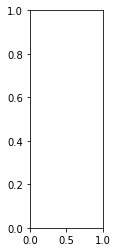

In [53]:
for itype in range(4):
    plt.subplot(1,4,itype+1)
    plt.imshow(YY_ss[:,-1,itype].reshape((6,6)))

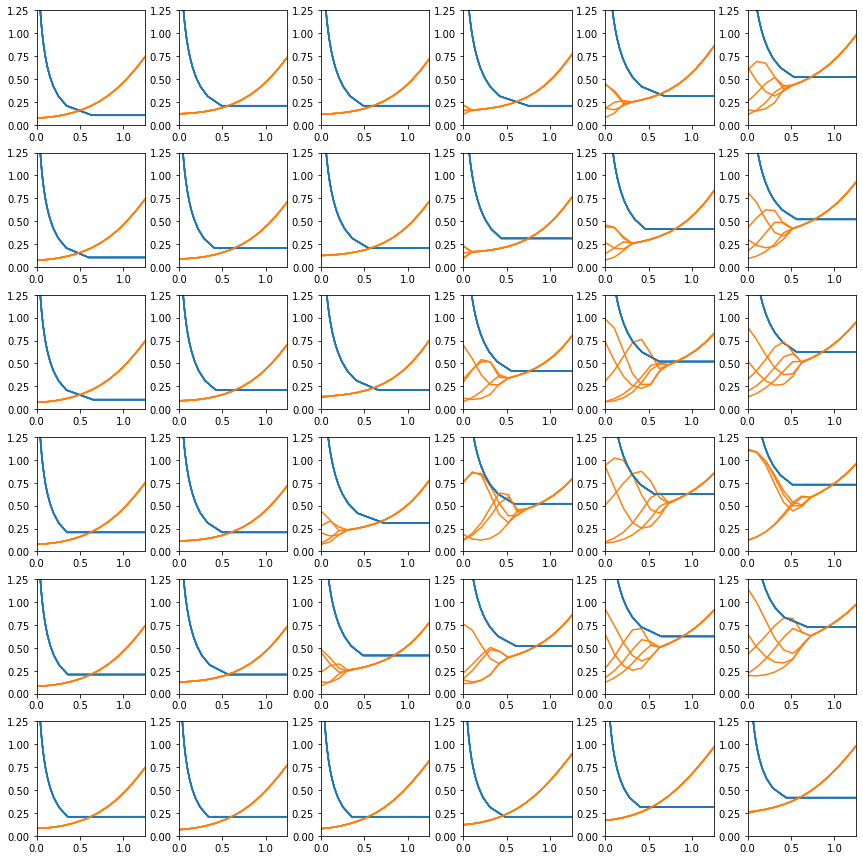

In [220]:
mag = 2
ix = 0
iy = 1
max_val = 2.5
Ny = 25
xvals = np.linspace(0,max_val,Ny)
plt.figure(figsize=(6*mag,6*mag))
for istim in range(YY_fix.shape[1]):
    plt.subplot(6,6,istim+1)
    for it in [-400,-300,-200,-100,-1]:
        plt.plot(YY_fix[iy,istim,:,it,ix],xvals,c='C0')
        plt.plot(xvals,YY_fix[ix,istim,:,it,iy],c='C1')
        plt.xlim((0,1.25))
        plt.ylim((0,1.25))
plt.tight_layout()

In [82]:
def f_basic(mu,sigma=1):
    return utils.f_miller_troyer(mu,sigma)
def run_small_sim(W,h,r0,f=f_basic,Niter=int(1e3),dt=1e-1):
    def drdt(r):
        return -r + f(r @ W + h)
    r = r0
    for t in range(Niter):
        r = r + dt*drdt(r)
    return r
    

In [253]:
# W = np.array(((1,2),(-3,-2)))
W = 2*np.array(((1,1),(-2,-1)))
# hs = [np.array((1,0.99)),np.array((1,1)),np.array((1,1.01))]
hs = [np.array((1,0.49)),np.array((1,0.75)),np.array((1,0.51))]
# h2 = np.array((1,1.25))
r0 = np.array((1,1))
nstim = 100
inputs = np.linspace(-2,2,nstim)
rs = [np.zeros((nstim,2)) for h in hs]
for iinp in range(len(hs)):
    for istim in range(nstim):
        rs[iinp][istim] = run_small_sim(W,hs[iinp]*inputs[istim],r0,f=lambda mu: utils.f_miller_troyer(mu,0.05))
        r0 = rs[iinp][istim].copy()

In [227]:
ww,vv = np.linalg.eig(W.T)

In [228]:
-h2 @ np.linalg.inv(W-1)

array([-0.5 ,  0.25])

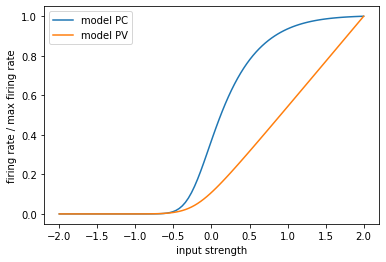

In [255]:
for iinp in (1,): #range(len(hs)):
    plt.figure()
    plt.plot(inputs,rs[iinp]/rs[iinp].max(0)[np.newaxis,:])
    plt.legend(['model PC','model PV'])
    plt.xlabel('input strength')
    plt.ylabel('firing rate / max firing rate')
plt.savefig('figures/toy_model_pc_pv.jpg',dpi=300)

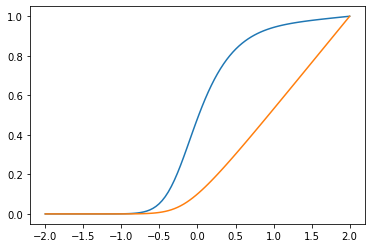

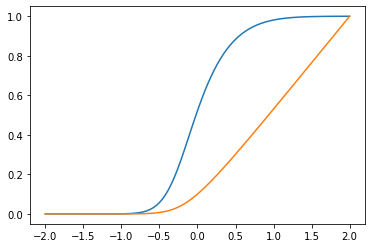

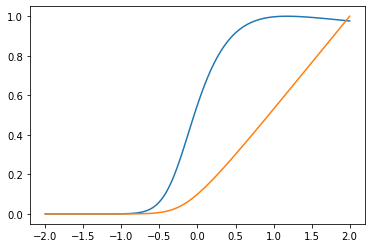

In [238]:
for iinp in range(len(hs)):
    plt.figure()
    plt.plot(inputs,rs[iinp]/rs[iinp].max(0)[np.newaxis,:])
# plt.plot(inputs,r2)

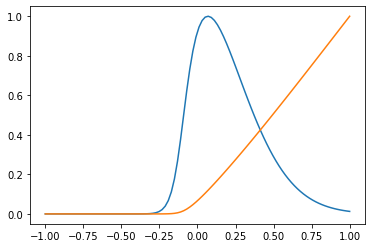

In [220]:
plt.figure()
plt.plot(inputs,r2/r2.max(0)[np.newaxis,:])

(0, 0.04)

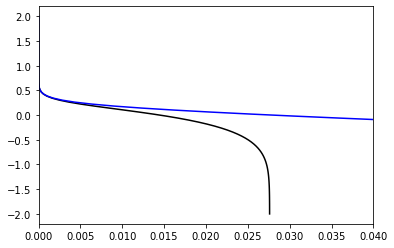

In [234]:
plt.figure()
plt.plot(r[:,0],-inputs,c='k')
plt.plot(r[:,1],-inputs,c='b')
plt.xlim((0,0.04))